<a href="https://colab.research.google.com/github/Ali-Ayyed/Machine-Learning/blob/Prediction/Calories_Burned_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
%matplotlib inline 

In [2]:
data1 = pd.read_csv('/content/drive/MyDrive/Datasets/Calories/calories.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Datasets/Calories/exercise.csv')

dataframe = pd.merge(data1, data2, on = 'User_ID')

dataframe

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [3]:
dataframe = dataframe.drop('User_ID', axis =1)

In [4]:
dataframe.isnull().sum()

Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

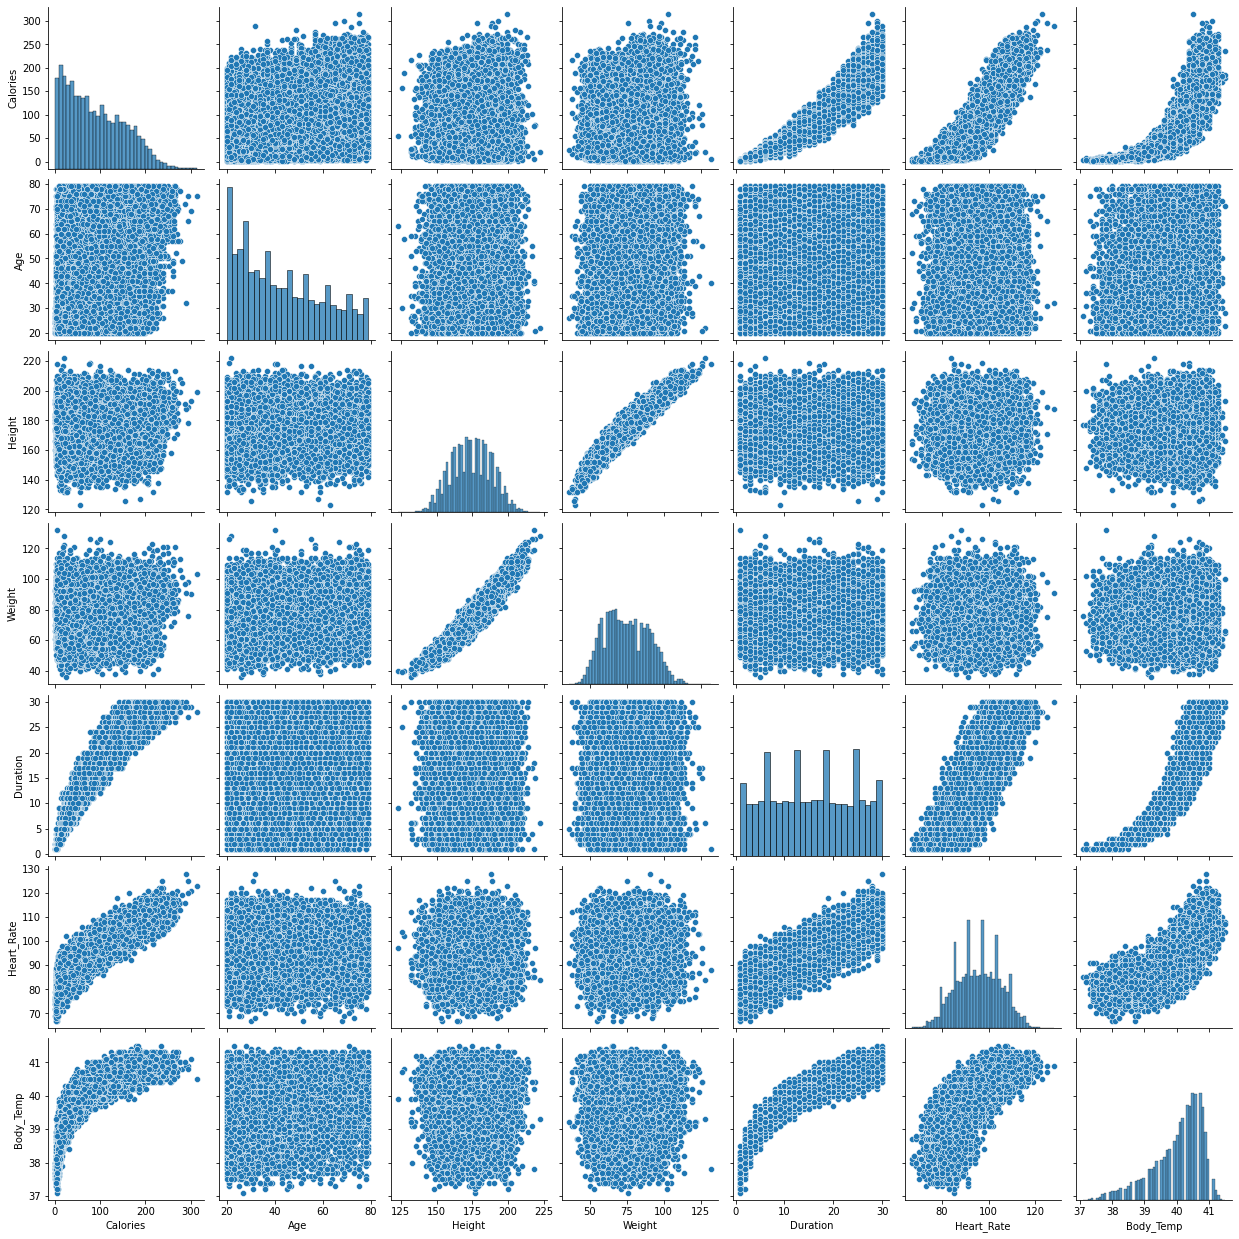

In [5]:
ax = sns.pairplot(dataframe)

In [6]:
dataframe = dataframe[dataframe['Calories'] < 300]

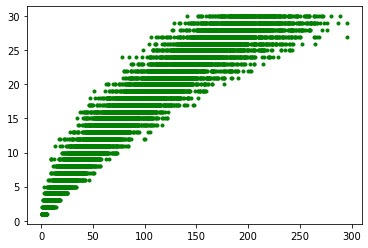

<Figure size 720x720 with 0 Axes>

In [7]:
plt.scatter(dataframe['Calories'],dataframe['Duration'], color= 'green', marker='.' )
plt.figure(figsize=(10,10))
plt.show()

In [8]:

dataframe['Gender'] = pd.get_dummies(dataframe['Gender'], drop_first=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
dataframe

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,0,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,0,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,0,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,1,78,193.0,97.0,2.0,84.0,38.3


In [10]:
X = dataframe.drop('Calories', axis = 1)
y = dataframe['Calories']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
xgb = XGBRegressor()

In [14]:
xgb.fit(X_train,y_train)

[20:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [16]:
score = xgb.score(X_test, y_test)  
print("Testing score: ", score)


Testing score:  0.9961782992385024


In [17]:
learner = LinearRegression()

In [18]:
learner.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
scorelr_test = learner.score(X_test, y_test)  
print("Testing score: ", score)

score_train = learner.score(X_train, y_train)  
print("Training score: ", score)

Testing score:  0.9961782992385024
Training score:  0.9961782992385024


In [27]:
scores = cross_val_score(learner, X_train, y_train, scoring='r2', cv=5)

In [28]:
scores*100

array([96.87580946, 96.93763402, 96.64443934, 96.66176029, 96.59172781])

In [25]:
from sklearn.model_selection import KFold

In [26]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(learner, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.96911725, 0.968777  , 0.96671825, 0.96529262, 0.96727438])